# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re

### 2. Import Dataset

In [2]:
df_cyber = pd.read_csv("Datasets/cyberbullying_tweets.csv")

### 3.  Check first 10 lines

In [3]:
df_cyber.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


### 4. Check Datasets type values and sum & drop duplicates

In [4]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [5]:
df_cyber.shape

(47692, 2)

In [6]:
df_cyber.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [7]:
df_cyber.tweet_text.duplicated().sum()

1686

In [8]:
df_cyber.duplicated(subset='tweet_text').sum()

1686

In [9]:
# df_cyber = df_cyber.drop_duplicates(keep='first')

In [10]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [11]:
df_cyber["cyberbullying_type"] = df_cyber["cyberbullying_type"].replace({"not_cyberbullying": 0})
df_cyber["cyberbullying_type"] = df_cyber["cyberbullying_type"].replace({"ethnicity": 1})
df_cyber["cyberbullying_type"] = df_cyber["cyberbullying_type"].replace({"age": 1})
df_cyber["cyberbullying_type"] = df_cyber["cyberbullying_type"].replace({"gender": 1})
df_cyber["cyberbullying_type"] = df_cyber["cyberbullying_type"].replace({"religion": 1})
df_cyber["cyberbullying_type"] = df_cyber["cyberbullying_type"].replace({"other_cyberbullying": 1})
df_cyber = df_cyber.rename(columns=({'cyberbullying_type':'annotation'}))
df_cyber = df_cyber.rename(columns=({'tweet_text':'content'}))

In [12]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     47692 non-null  object
 1   annotation  47692 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 745.3+ KB


In [13]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

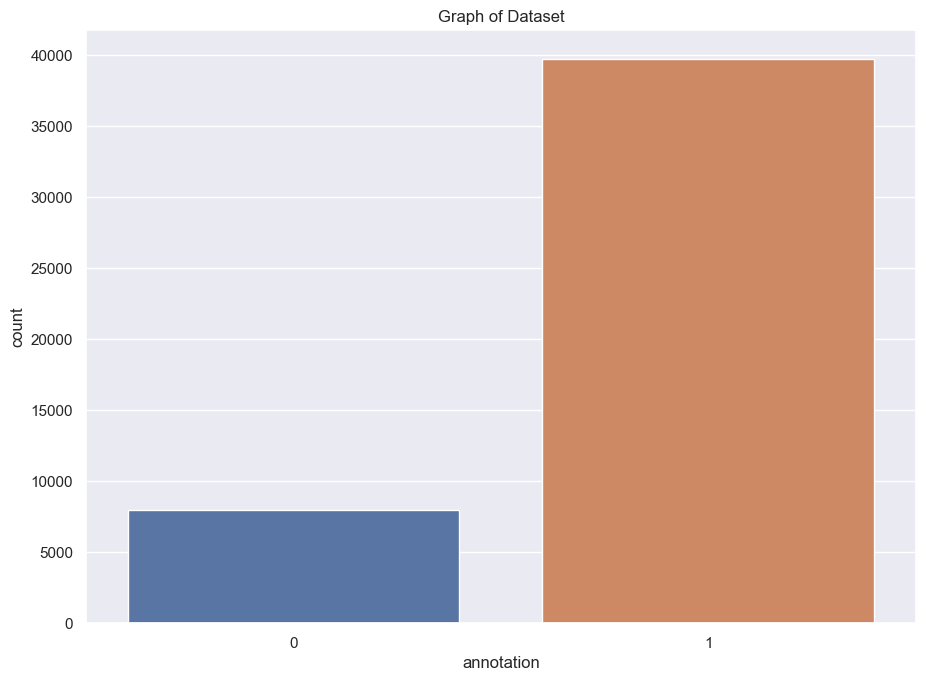

In [14]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='annotation',data=df_cyber).set(title="Graph of Dataset")

### 6.  WordCloud of Dataset

In [15]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # Remove emoji's
    tweet = re.sub(r':[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [16]:
df_cyber["content"] = df_cyber["content"].apply(clean_tweets)
df_cyber.head(30)

,content,annotation
0,In other words your food was crapilicious,0
1,Why is so white,0
2,a classy whore Or more red velvet cupcakes,0
3,meh thanks for the heads up but not too conce...,0
4,This is an ISIS account pretending to be a Kur...,0
5,Yes the test of god is that good or bad or ind...,0
6,Itu sekolah ya bukan tempat bully Ga jauh kaya...,0
7,Karma I hope it bites Kat on the butt She is j...,0
8,everything but mostly my priest,0
9,Rebecca Black Drops Out of School Due to Bullying,0


In [17]:
# Identify rows with empty text
empty_rows = df_cyber[df_cyber.applymap(lambda x: x == '').any(axis=1)]

# Remove these rows from the dataset
df_cyber = df_cyber.drop(empty_rows.index)
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47309 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     47309 non-null  object
 1   annotation  47309 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [18]:
df_cyber.head(30)

,content,annotation
0,In other words your food was crapilicious,0
1,Why is so white,0
2,a classy whore Or more red velvet cupcakes,0
3,meh thanks for the heads up but not too conce...,0
4,This is an ISIS account pretending to be a Kur...,0
5,Yes the test of god is that good or bad or ind...,0
6,Itu sekolah ya bukan tempat bully Ga jauh kaya...,0
7,Karma I hope it bites Kat on the butt She is j...,0
8,everything but mostly my priest,0
9,Rebecca Black Drops Out of School Due to Bullying,0


### 7. Stopwords

In [19]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [21]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                          for token in str(sentence).split()
                                          if token not in stopwords.words('english')))

    return preprocessed_text

In [22]:
preprocessed_review = preprocess_text(df_cyber['content'].values)
df_cyber['content']= preprocessed_review

100%|██████████| 47309/47309 [03:48<00:00, 206.93it/s]


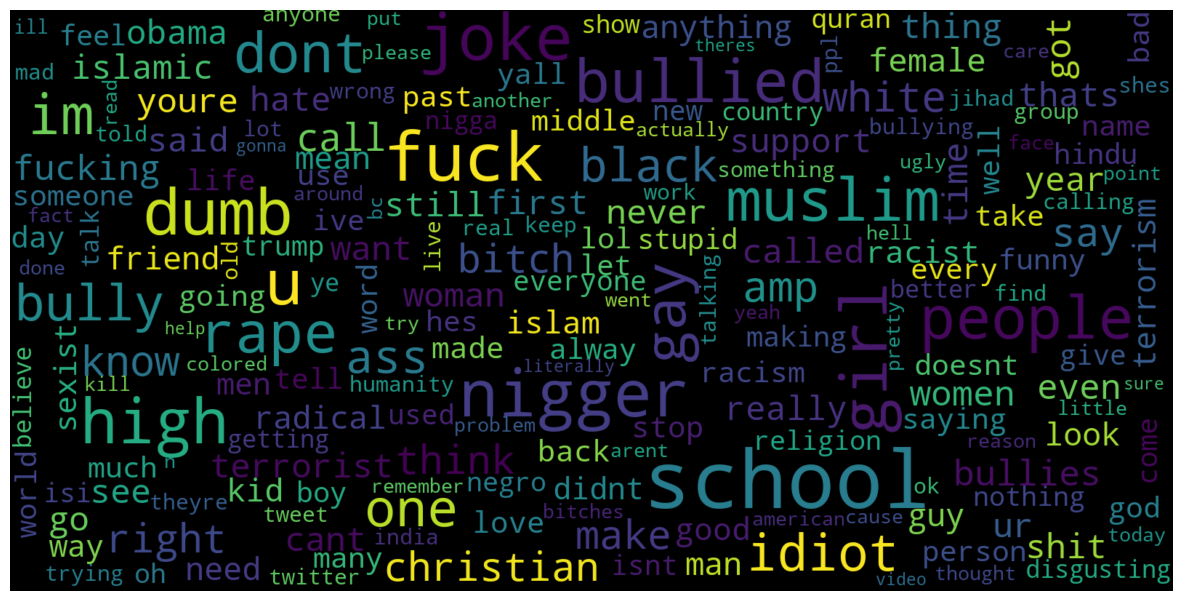

In [23]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['content'][df_cyber['annotation'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

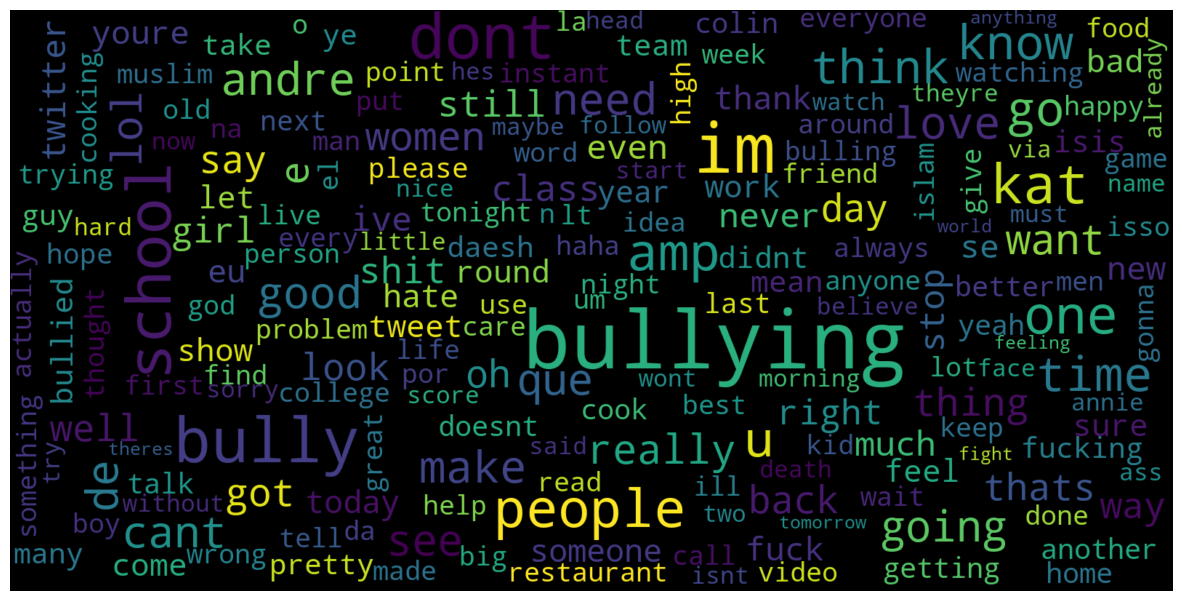

In [24]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['content'][df_cyber['annotation'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

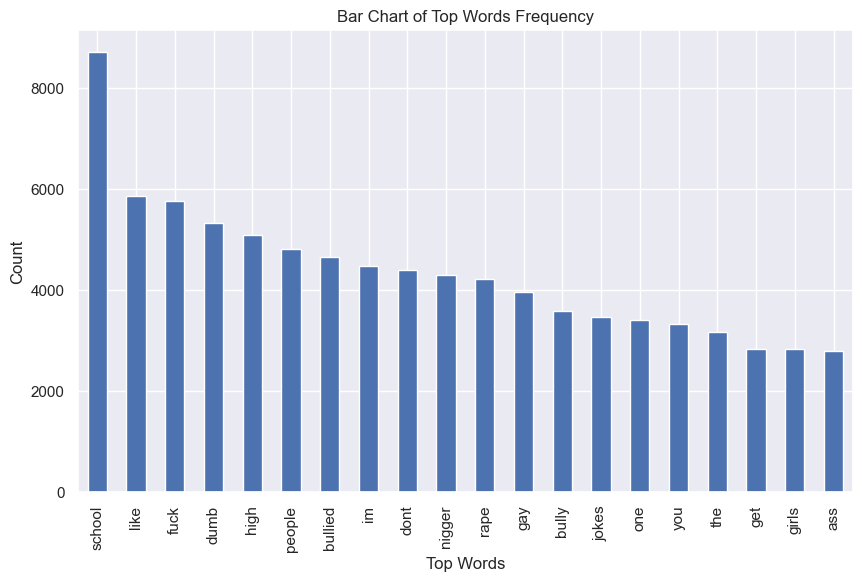

In [25]:

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['content'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['content'],
                                                    df_cyber['annotation'],
                                                    test_size=0.2,
                                                    random_state=1)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [27]:
x_train.shape

(37847,)

In [28]:
x_test.shape

(9462,)

In [29]:
y_train.shape

(37847,)

In [30]:
y_test.shape

(9462,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [32]:
print(x_train)

  (0, 20389)	0.2182520711009344
  (0, 34858)	0.4293019334432267
  (0, 34322)	0.30106401999742705
  (0, 36721)	0.4361986781767668
  (0, 7060)	0.3422413665519336
  (0, 21587)	0.33171334817659015
  (0, 9131)	0.40518707853638947
  (0, 21023)	0.2268571121681117
  (0, 32072)	0.21060255489884774
  (1, 26297)	0.7256966218116024
  (1, 20826)	0.41265118479785073
  (1, 1071)	0.4759030535959484
  (1, 16515)	0.27676650150299953
  (2, 5421)	0.23012704542565451
  (2, 268)	0.2828299423527121
  (2, 25703)	0.09341502546761177
  (2, 20368)	0.20609538658884552
  (2, 267)	0.24528364101904968
  (2, 2849)	0.46025409085130903
  (2, 13667)	0.21871892884587193
  (2, 9894)	0.18883868601153986
  (2, 24443)	0.4656753978967477
  (2, 39021)	0.41219077317769104
  (2, 1016)	0.228867100514919
  (2, 36006)	0.14565788702263627
  :	:
  (37844, 38937)	0.18808985839139858
  (37844, 19042)	0.20191979305050567
  (37845, 22284)	0.3574282140911939
  (37845, 32229)	0.28872059379593623
  (37845, 9512)	0.3678752259241009
  (37845,

In [33]:
print(x_test)

  (0, 36996)	0.3886375530109487
  (0, 36717)	0.26800378225243254
  (0, 32153)	0.3215800189793917
  (0, 28468)	0.3886375530109487
  (0, 27781)	0.24255929256022846
  (0, 23314)	0.34927963803256384
  (0, 8434)	0.23420266527497663
  (0, 7863)	0.3886375530109487
  (0, 4837)	0.16929852509530854
  (0, 783)	0.3275647512901287
  (1, 38703)	0.21569638003119057
  (1, 34745)	0.16952614929379295
  (1, 22615)	0.20180865668339948
  (1, 20901)	0.1950781933434746
  (1, 20389)	0.19856357133580393
  (1, 20038)	0.2341054165528567
  (1, 19906)	0.1301535817819434
  (1, 19582)	0.2600205425407331
  (1, 16516)	0.30450414011191534
  (1, 16481)	0.22809844265706908
  (1, 16299)	0.24312611923493352
  (1, 15848)	0.2701158845656819
  (1, 15090)	0.18856570514496016
  (1, 12164)	0.24790097570287142
  (1, 5517)	0.2311066925082796
  :	:
  (9458, 19042)	0.3477716657311101
  (9458, 9246)	0.4106392907127154
  (9458, 8145)	0.6154463708076876
  (9458, 4825)	0.30790093982705724
  (9459, 12172)	0.6358388086525176
  (9459, 1021

### Logistic Regression (LR)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8948397495177953
0.8610230395265271


In [35]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.30      0.71      0.42       676
           1       0.98      0.87      0.92      8786

    accuracy                           0.86      9462
   macro avg       0.64      0.79      0.67      9462
weighted avg       0.93      0.86      0.89      9462



### Desicion Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9722038734906333
0.8207567110547453


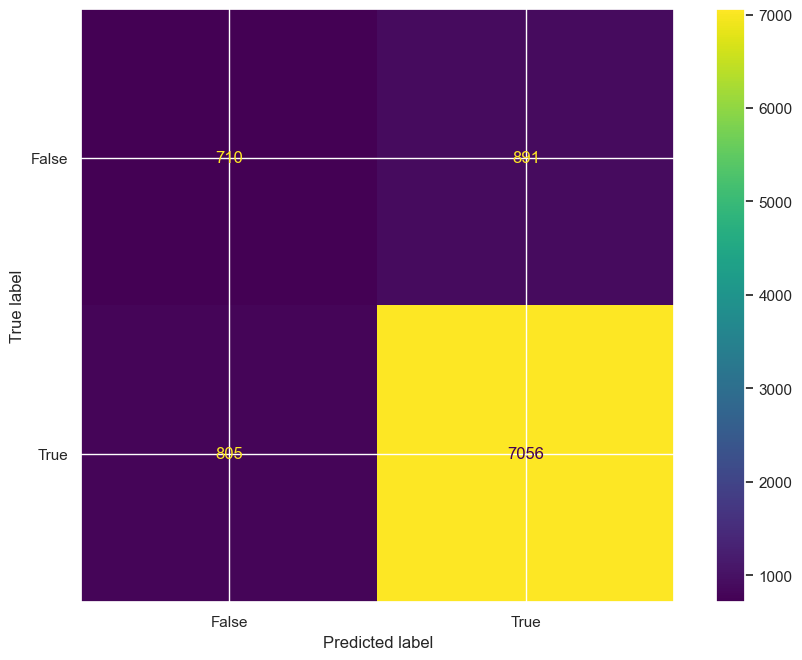

In [37]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [38]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46      1515
           1       0.90      0.89      0.89      7947

    accuracy                           0.82      9462
   macro avg       0.67      0.68      0.67      9462
weighted avg       0.82      0.82      0.82      9462



### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9715961635004096
0.8443246670894102


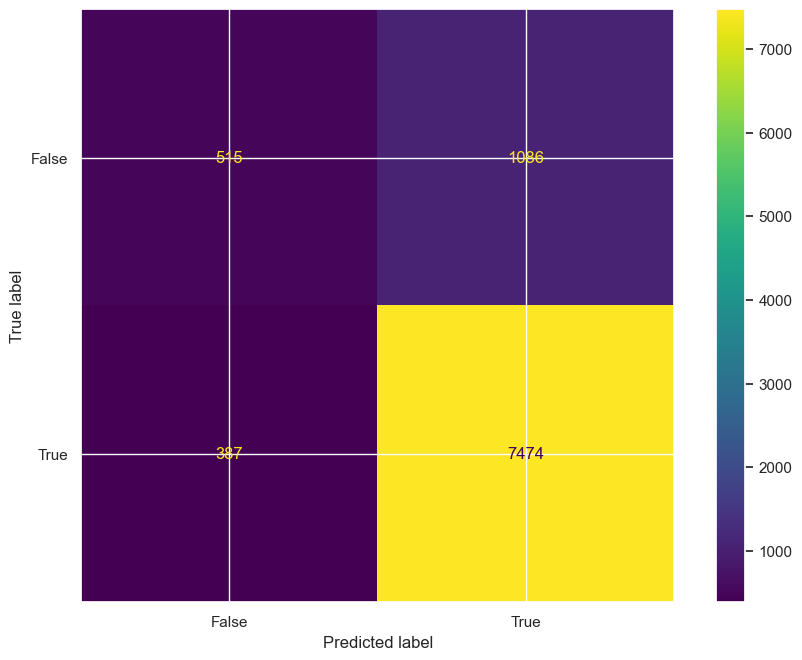

In [40]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [41]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.32      0.57      0.41       902
           1       0.95      0.87      0.91      8560

    accuracy                           0.84      9462
   macro avg       0.64      0.72      0.66      9462
weighted avg       0.89      0.84      0.86      9462



### XGBoost

In [42]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8795677332417364
0.8626083280490383


In [44]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.28      0.76      0.40       583
           1       0.98      0.87      0.92      8879

    accuracy                           0.86      9462
   macro avg       0.63      0.81      0.66      9462
weighted avg       0.94      0.86      0.89      9462



### Multinomial Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8587999048801754
0.8467554428239273


In [46]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.10      0.94      0.18       171
           1       1.00      0.85      0.92      9291

    accuracy                           0.85      9462
   macro avg       0.55      0.89      0.55      9462
weighted avg       0.98      0.85      0.90      9462



### Support Vector Machine

In [47]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9178006182788596
0.862714013950539


In [48]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.35      0.68      0.47       828
           1       0.97      0.88      0.92      8634

    accuracy                           0.86      9462
   macro avg       0.66      0.78      0.69      9462
weighted avg       0.91      0.86      0.88      9462



### Bagging Decision Tree (Ensemble Learning I)

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9619520701772928
0.841999577256394


In [50]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.41      0.54      0.47      1214
           1       0.93      0.89      0.91      8248

    accuracy                           0.84      9462
   macro avg       0.67      0.71      0.69      9462
weighted avg       0.86      0.84      0.85      9462



### Boosting Decision Tree (Ensemble Learning II)

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=5000,learning_rate=0.6)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9722038734906333
0.8355527372648489


In [52]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.38      0.52      0.44      1179
           1       0.93      0.88      0.90      8283

    accuracy                           0.84      9462
   macro avg       0.66      0.70      0.67      9462
weighted avg       0.86      0.84      0.85      9462

